In [2]:
#Nav_IMS0000_24th_feb.Asc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
my_example_nc_file = 'EUREC4A_HALO_BAHAMAS-Radiometer_20200122a.nc'
fh = Dataset(my_example_nc_file, mode='r')
df_fdir = pd.read_csv('BBR_DirectFraction_Flight_20200122a_R0.dat',skiprows = 34,delim_whitespace=True)
df_fdw = pd.read_csv('BBR_Fdn_clear_sky_Flight_20200122a_R0.dat',skiprows = 34, delim_whitespace=True)
nav = pd.read_csv('Nav_IMS0000_24th_jan.Asc',skiprows=14, header=None,delim_whitespace=True)
navi = nav.iloc[:,1:5]
navi.columns=['time','roll','pitch','yaw']
fdw_time = df_fdw.loc[:,['sod','F_dw']]
fdir_time = df_fdir.loc[:,'f_dir']
db = pd.concat([fdw_time,fdir_time],axis=1)
db.set_index('sod',inplace=True)
time = fh.variables['TIME'][:] # time
time_bac = pd.DataFrame(time.T, columns = ['time'])
time_bac = time_bac/1000
db,time_bac

(             F_dw     f_dir
 sod                        
 51732  749.328064  0.839369
 51852  753.582519  0.839970
 51972  757.783569  0.840578
 52092  761.861694  0.841114
 52212  765.792114  0.841549
 ...           ...       ...
 76116  142.642242  0.880006
 76236  128.762726  0.871641
 76356  115.744110  0.862479
 76476  103.764328  0.852676
 76596   92.938942  0.842318
 
 [208 rows x 2 columns],            time
 0       53856.0
 1       53856.1
 2       53856.2
 3       53856.3
 4       53856.4
 ...         ...
 331755  87031.5
 331756  87031.6
 331757  87031.7
 331758  87031.8
 331759  87031.9
 
 [331760 rows x 1 columns])

In [8]:
array = np.arange(51732,87032, 1)
arr = array.repeat(10)
df_arr = pd.DataFrame(arr, columns = ['time_arr'])
df_arr.set_index('time_arr',inplace=True)
data = df_arr.join(db)
data_int= data.interpolate(method='linear', limit_direction='forward', axis=0)
data_int.reset_index(inplace=True)
data_int.drop(data_int.index[0:21240],inplace=True)
data_int.columns=['time','F_dw','f_dir']
data_int.reset_index(inplace=True,drop=True)
data_int
#data_int['time']=data_int.loc[:,'index']
#data_int[data_int['time']==53856]
#df_r = data_int.iloc[0:16420,:]
#df_r

,time,F_dw,f_dir
0,53856,825.184584,0.860369
1,53856,825.201364,0.860384
2,53856,825.218143,0.860400
3,53856,825.234923,0.860416
4,53856,825.251702,0.860431
...,...,...,...
331755,87031,92.938942,0.842318
331756,87031,92.938942,0.842318
331757,87031,92.938942,0.842318
331758,87031,92.938942,0.842318


In [9]:
fdw = data_int.loc[:,'F_dw']
fdir = data_int.loc[:,'f_dir']
szai = fh.variables['SUN_ALT'][:] # solar altitude angle
sza = pd.DataFrame(szai.T)
sza.columns=['SUN_ALT']
saai = fh.variables['SUN_AZI'][:] # solar azimuth angle
saa = pd.DataFrame(saai.T)
saa.columns=['SUN_AZI']
SWd = fh.variables['FDSC'][:]
SWD = pd.DataFrame(SWd.T)
SWD.columns=['shortwave_down']
SWu = fh.variables['FUS'][:]
LWu = fh.variables['FDL'][:]
LWd = fh.variables['FUL'][:]
SWU = pd.DataFrame(SWu.T)
SWU.columns=['ShortWave_up']
LWU = pd.DataFrame(LWu.T)
LWU.columns=['LongWave_down']
LWD = pd.DataFrame(LWd.T)
LWD.columns=['LongWave_up']
radiometer_nc= pd.concat([time_bac,SWD,SWU,LWU,LWD,saa,sza,fdw,fdir],axis=1)
d = radiometer_nc.loc[:,'time'].astype(str).str.split('.')
dec = []
for b,n in d:
    dec.append(b)
decend = pd.DataFrame(dec)
decend.columns=['Time']
df2=pd.concat([decend,radiometer_nc],axis=1)
df2.drop(['time'],axis=1,inplace=True)
df2

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir
0,53856,1127.919556,55.881809,399.782684,496.638397,150.266846,52.646587,825.184584,0.860369
1,53856,1124.523560,56.087418,409.833771,496.288483,150.267517,52.646809,825.201364,0.860384
2,53856,1122.032227,54.827232,418.135010,495.416443,150.268188,52.647030,825.218143,0.860400
3,53856,1119.755493,53.240158,418.499451,495.249146,150.268845,52.647251,825.234923,0.860416
4,53856,1119.200928,52.260509,418.141724,494.598175,150.269516,52.647472,825.251702,0.860431
...,...,...,...,...,...,...,...,...,...
331755,87031,-1.365792,-2.331661,425.671509,450.715576,-104.877716,-31.915932,92.938942,0.842318
331756,87031,-1.462777,-2.396793,418.746094,450.559784,-104.877678,-31.916372,92.938942,0.842318
331757,87031,-0.953005,-2.230292,428.158813,450.392181,-104.877632,-31.916815,92.938942,0.842318
331758,87031,0.468739,-2.740185,428.035187,449.961365,-104.877594,-31.917257,92.938942,0.842318


In [10]:
ri = fh.variables['IRS_PHI'][:] # roll angle "deg"
ro = pd.DataFrame(ri.T,columns=['roll'])
pi = fh.variables['IRS_THE'][:] # pitch angle "deg"
po = pd.DataFrame(pi.T,columns=['pitch'])
yi = fh.variables['IRS_HDG'][:] # yaw angle "deg"
y = pd.DataFrame(yi.T,columns=['yaw'])
df_big = pd.concat([df2,ro,po,y],axis=1)
df_big

,Time,shortwave_down,ShortWave_up,LongWave_down,LongWave_up,SUN_AZI,SUN_ALT,F_dw,f_dir,roll,pitch,yaw
0,53856,1127.919556,55.881809,399.782684,496.638397,150.266846,52.646587,825.184584,0.860369,-0.291226,5.955765,75.550194
1,53856,1124.523560,56.087418,409.833771,496.288483,150.267517,52.646809,825.201364,0.860384,-0.366062,6.125789,75.531601
2,53856,1122.032227,54.827232,418.135010,495.416443,150.268188,52.647030,825.218143,0.860400,-0.396795,6.261031,75.507866
3,53856,1119.755493,53.240158,418.499451,495.249146,150.268845,52.647251,825.234923,0.860416,-0.447740,6.350412,75.495476
4,53856,1119.200928,52.260509,418.141724,494.598175,150.269516,52.647472,825.251702,0.860431,-0.517399,6.417670,75.479584
...,...,...,...,...,...,...,...,...,...,...,...,...
331755,87031,-1.365792,-2.331661,425.671509,450.715576,-104.877716,-31.915932,92.938942,0.842318,1.043174,3.283956,73.478813
331756,87031,-1.462777,-2.396793,418.746094,450.559784,-104.877678,-31.916372,92.938942,0.842318,1.199044,3.157067,73.526596
331757,87031,-0.953005,-2.230292,428.158813,450.392181,-104.877632,-31.916815,92.938942,0.842318,1.332494,3.049670,73.566544
331758,87031,0.468739,-2.740185,428.035187,449.961365,-104.877594,-31.917257,92.938942,0.842318,1.465332,2.970180,73.641922


In [11]:
import math
r_off =  0.3
p_off =  -2.33
i1=[]
i2=[]
j1=[]
j2=[]
k1=[]
k2=[]
l1=[]
l2=[]

for i in df_big.SUN_ALT:
    i1.append(math.sin((90-i)*(math.pi/180)))
    i2.append(math.cos((90-i)*(math.pi/180)))
for k in df_big.roll:
    k=k+r_off
    k1.append(math.sin(k*(math.pi/180)))
    k2.append(math.cos(k*(math.pi/180)))
diff = df_big.SUN_AZI-df_big.yaw
for j in diff:
    j1.append(math.sin(j*(math.pi/180)))
    j2.append(math.cos(j*(math.pi/180)))
for l in df_big.pitch:
    l=l+p_off
    l1.append(math.sin(l*(math.pi/180)))
    l2.append(math.cos(l*(math.pi/180)))
       
eq1 = i1
eq2 = [i2[i]*k1[i]*j1[i] for i in range(len(i2))]
eq3 = [i2[i]*l1[i] for i in range(len(i2))]
eq4 = [k2[i]*j2[i] for i in range(len(k2))]
eq5 = [i1[i]*l2[i]*k2[i] for i in range(len(i1))]
factor = [eq1[i]/(eq2[i]+(eq3[i]*eq4[i])+eq5[i]) for i in range(len(eq1))]
x = df_big.F_dw
y = df_big.f_dir
Fdw = [y[i]*x[i]*factor[i]+(1-y[i])*x[i] for i in range(len(i1))]

swd_correct = pd.DataFrame(Fdw)
swd_correct.columns = ['shortwave_down_corrected']
df_big['shortwave_down_corrected']=swd_correct
df_bigg = df_big.groupby('Time').mean()
df_bigg.reset_index(inplace=True)
#df_bigg.to_csv('df_bigg_31jan.csv')

In [14]:
def convertSeconds(seconds):
    h = seconds//(60*60)
    m = (seconds-h*60*60)//60
    s = seconds-(h*60*60)-(m*60)
    return [h, m, s]
convertSeconds(87031)

[24, 10, 31]

In [15]:
import datetime
start = datetime.datetime(2020, 1, 22, 14, 57, 36)
end = datetime.datetime(2020, 1, 23, 0, 10, 31)
delta = end - start
time_delta = []
for i in range(delta.seconds + 1):
    time_delta.append(start + datetime.timedelta(seconds=i))
df_time_delta = pd.DataFrame(time_delta)
df_bigg['time']=df_time_delta
df_bigg.to_csv('df_bigg_22jan.csv')

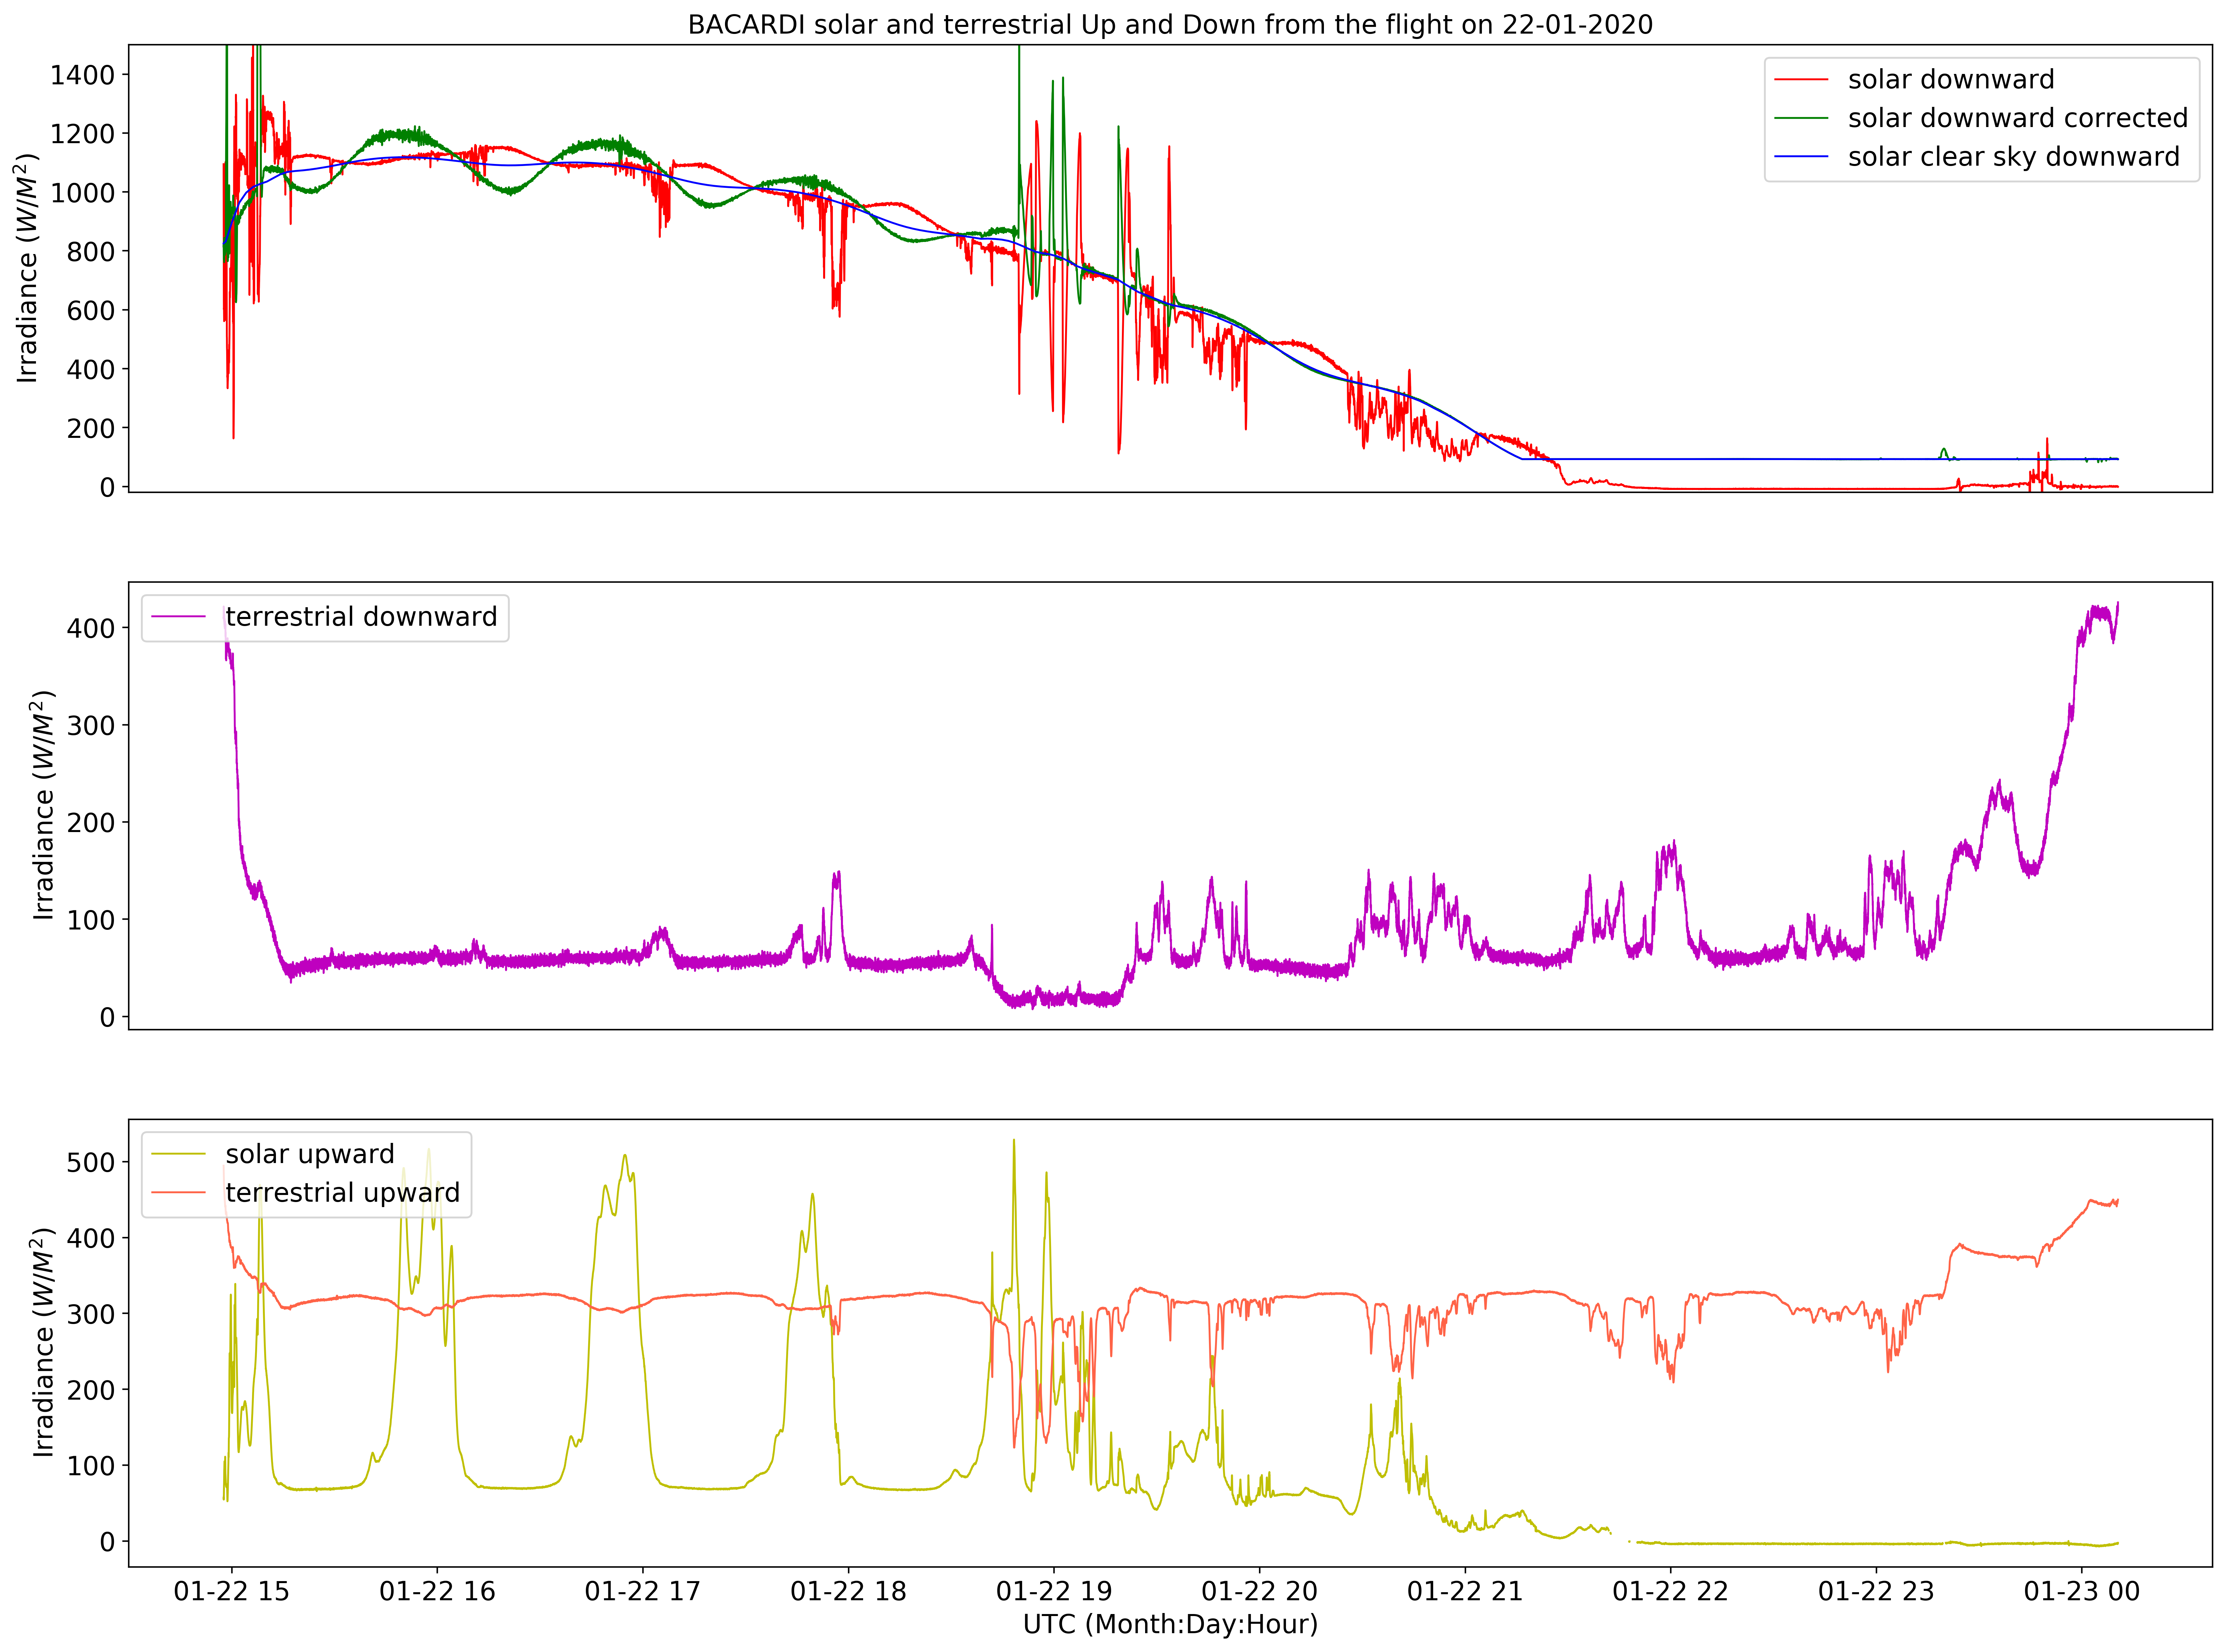

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
#df_new_24jan = pd.read_csv('df_new_24jan.csv')
plt.figure(figsize=(20,15),dpi=400)
plt.subplot(311)
plt.plot(df_bigg.time,df_bigg.shortwave_down, 'r', label = 'solar downward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.shortwave_down_corrected, 'g', label = 'solar downward corrected',linewidth=1)
plt.plot(df_bigg.time,df_bigg.F_dw, 'b', label = 'solar clear sky downward',linewidth=1)
plt.title('BACARDI solar and terrestrial Up and Down from the flight on 22-01-2020',fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper right')
plt.ylim(-20,1500)
plt.subplot(312)
plt.plot(df_bigg.time,df_bigg.LongWave_down, 'm', label = 'terrestrial downward',linewidth=1)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xticks([], [])
plt.yticks(fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.subplot(313)
plt.plot(df_bigg.time,df_bigg.ShortWave_up, 'y', label = 'solar upward',linewidth=1)
plt.plot(df_bigg.time,df_bigg.LongWave_up, 'tomato', label = 'terrestrial upward',linewidth=1)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Irradiance ($W/M^2$)',fontsize=14)
plt.xlabel('UTC (Month:Day:Hour)',fontsize=14)
plt.legend(fontsize=14,loc='upper left')
plt.show()